<a href="https://colab.research.google.com/github/Radhikakhot66-VCTI/Python_libraries/blob/Pavan/L7_CRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd

path = "/content/drive/MyDrive/Colab Notebooks/GeoPandas/files/ne_110m_admin_0_countries.shp"
world = gpd.read_file(path)

print(world.crs)  # Usually EPSG:4326

EPSG:4326


In [2]:
# Reproject to Web Mercator (for buffering)
world_m = world.to_crs(epsg=3857)
print(world_m.crs)

# Reproject to India UTM Zone 43N
india = world[world["ADMIN"] == "India"]
india_utm = india.to_crs(epsg=32643)
print(india_utm.crs)

EPSG:3857
EPSG:32643


In [3]:
# Area in square meters (after projecting)
india_area_m2 = india_utm.geometry.area.iloc[0]
india_area_km2 = india_area_m2 / 1e6

print(f"India area ≈ {india_area_km2:.2f} sq. km")

India area ≈ 3185379.70 sq. km


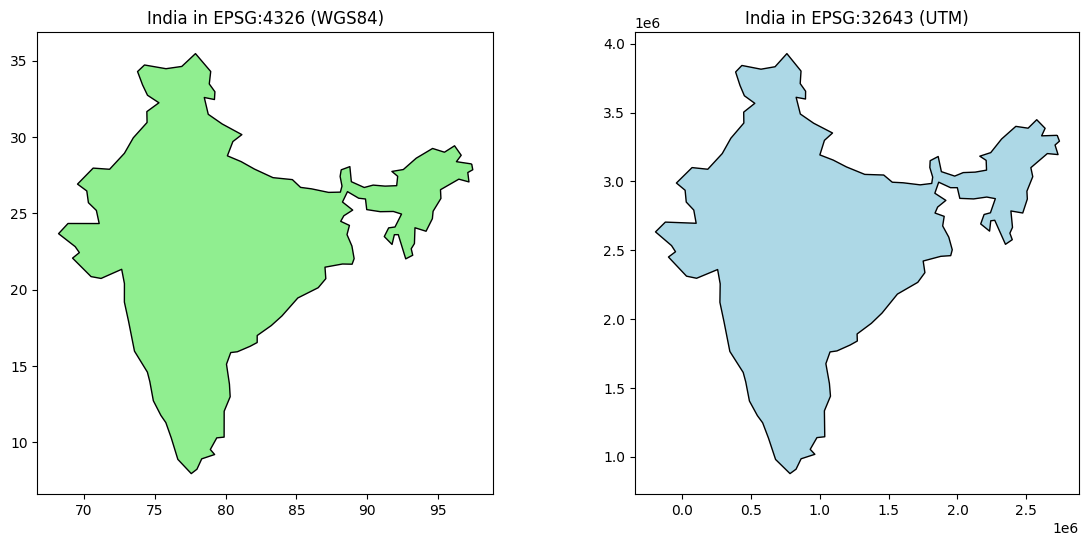

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
india.plot(ax=ax[0], color='lightgreen', edgecolor='black')
ax[0].set_title("India in EPSG:4326 (WGS84)")

india_utm.plot(ax=ax[1], color='lightblue', edgecolor='black')
ax[1].set_title("India in EPSG:32643 (UTM)")
plt.show()
